<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [6]:
#Loading and reading the data file.
#From Lecture note.
sleep  = pd.read_csv('/Users/aminatacissokho/Desktop/ECON628-01/datasets/sleep/sleep_bh.csv')

In [7]:
#Looking at the first three rows  of the data file. 
#Lecture note 1.2
sleep.head(3)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936


In [8]:
#Checking to see how many rows and colums the data file consists of. 
#Lecture note. 
sleep.shape

(706, 34)

In [10]:
#Checking how the variables are treated as. 
#Lecture note 1.2
sleep.dtypes[0:4]

age           int64
black         int64
case          int64
clerical    float64
dtype: object

In [11]:
#Summary of the dataset. 
sleep.describe()

/Users/aminatacissokho/anaconda/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815864,0.049575,353.500000,0.182331,0.030075,12.780453,9767.705382,0.890935,0.753541,4690.723796,...,0.480170,2122.920680,0.218130,2093.252125,29.668555,20.035411,0.128895,11.769122,5.082839,1635.144476
std,11.342637,0.217219,203.948932,0.335413,0.148366,2.784702,9323.588151,0.311942,0.431254,908.049561,...,0.499961,947.470123,0.413269,945.301457,148.834262,12.377520,0.335321,11.591227,3.704385,950.102976
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.000000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,NaN,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.000000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,NaN,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.000000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,NaN,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509987,4225.000000


In [12]:
#Checking for the missing values contained in the data file
#Lecture note 'MEGA_lab_regression_solutions.ipynb'.
sleep.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [19]:
#Dropping the missing values contained in the dataset. 
#Lecture note MEGA_lab_regression_solutions.ipynb.
sleep1=sleep.dropna()

In [21]:
#Checking the shape of the new dataset after the dropping of the missing values. 
sleep1.shape

(532, 34)

In [124]:
sleep1.describe()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.0,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,38.317669,0.050752,266.500000,0.182331,0.030075,12.731203,9703.947368,0.885338,1.0,4659.988722,...,0.524436,2160.545113,0.219925,2130.272556,30.272556,19.586466,0.140977,11.176692,5.082839,1594.186090
std,11.232965,0.219697,153.719441,0.386480,0.170955,2.693566,8214.777772,0.318913,0.0,892.359993,...,0.499873,933.404842,0.414585,929.333193,147.130248,12.188339,0.348326,11.232971,3.704385,935.689295
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,2090.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,133.750000,0.000000,0.000000,12.000000,3500.000000,1.000000,1.0,4102.750000,...,0.000000,1611.000000,0.000000,1583.750000,0.000000,10.000000,0.000000,0.000000,2.890001,841.000000
50%,36.000000,0.000000,266.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.0,4595.000000,...,1.000000,2300.000000,0.000000,2288.000000,0.000000,17.000000,0.000000,8.000000,4.379999,1296.000000
75%,47.000000,0.000000,399.250000,0.000000,0.000000,15.000000,13750.000000,1.000000,1.0,5112.750000,...,1.000000,2700.000000,0.000000,2652.250000,0.000000,29.000000,0.000000,18.250000,6.210001,2209.000000
max,65.000000,1.000000,532.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.0,7335.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509987,4225.000000


In [119]:

list_val1 = [row for index, row in sleep.iterrows() if row.sum() ==0 ]
list_miss_val

[age           32.000000
 black          0.000000
 case           1.000000
 clerical       0.000000
 construc       0.000000
 educ          12.000000
 earns74        0.000000
 gdhlth         0.000000
 inlf           1.000000
 leis1       3529.000000
 leis2       3479.000000
 leis3       3479.000000
 smsa           0.000000
 lhrwage        1.955861
 lothinc       10.075380
 male           1.000000
 marr           1.000000
 prot           1.000000
 rlxall      3163.000000
 selfe          0.000000
 sleep       3113.000000
 slpnaps     3163.000000
 south          0.000000
 spsepay        0.000000
 spwrk75        0.000000
 totwrk      3438.000000
 union          0.000000
 worknrm     3438.000000
 workscnd       0.000000
 exper         14.000000
 yngkid         0.000000
 yrsmarr       13.000000
 hrwage         7.070004
 agesq       1024.000000
 Name: 0, dtype: float64, age           31.000000
 black          0.000000
 case           2.000000
 clerical       0.000000
 construc       0.000000


In [122]:
list_val2 = [row for index, row in sleep1.iterrows() if row.sum() ==1 ]
list_val2

[]

## 3. Check for correlations
    Implement a correlation heatmap
---

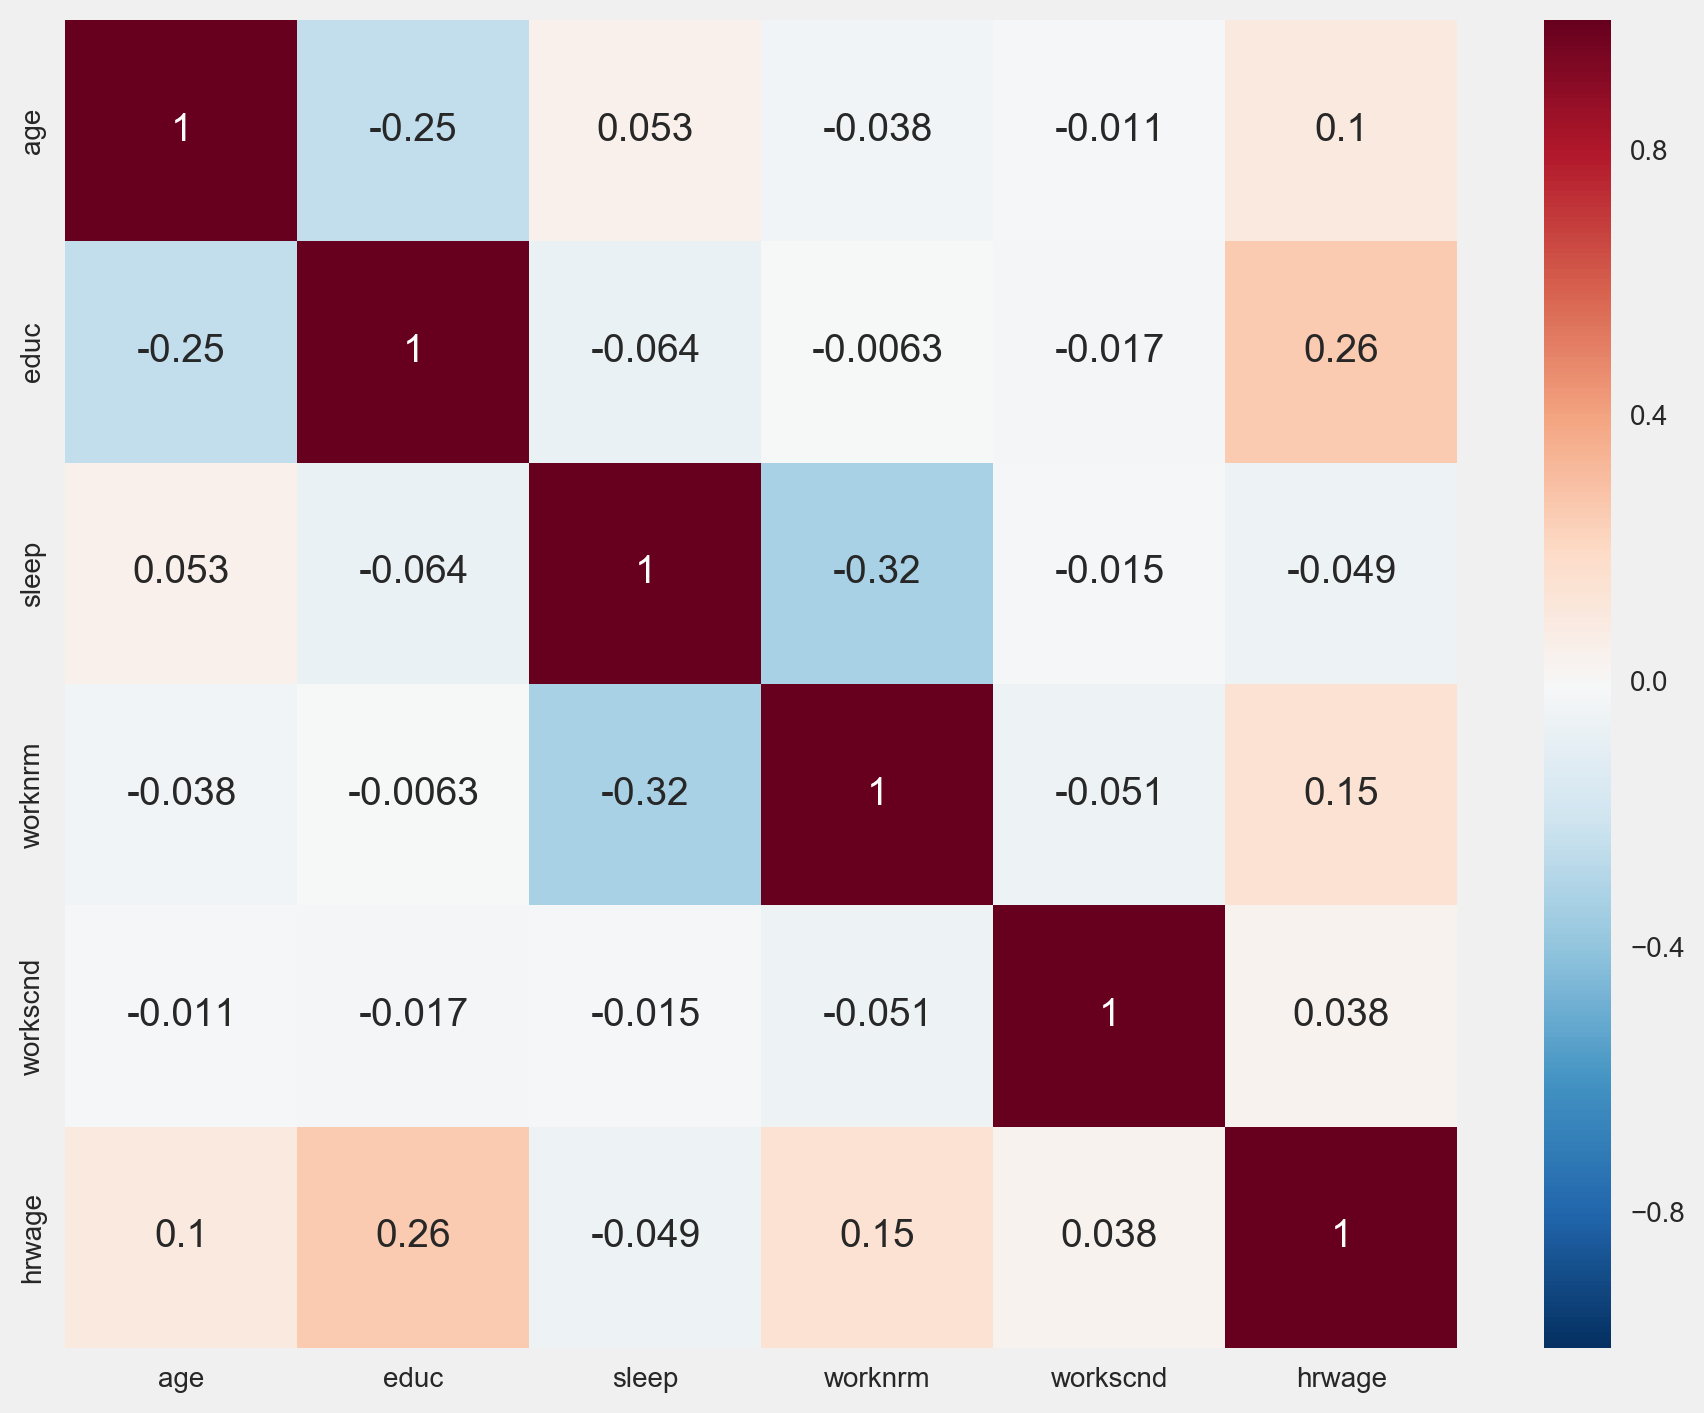

In [123]:
#Showing the correlation among variables, and plotting a map for better visualization.
#Project 1. 
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(sleep1[['age','educ','sleep','worknrm','workscnd','hrwage']].corr(),annot=True, ax=ax)
plt.show()


## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [82]:
#Assigning variables to x (explanatory variable) and y (dependent variable).
#Lecture note 'MEGA_lab_regression_solutions.ipynb'.
X = sleep1[['age','black','clerical','educ','gdhlth','inlf','male','hrwage','hrwage','spwrk75','selfe','worknrm',
'workscnd','totwrk','lhrwage','marr']]
y = sleep1.sleep

In [83]:
#Importing tools necessary to perform the regressions.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [84]:
#Now splitting the dataset into two (train and test)
#Lecture note 'MEGA_lab_regression_solutions.ipynb'
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(372, 16) (160, 16)


(372,) (160,)


In [85]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

In [86]:
#Importing tools to read the and work with the redressions.
#lecture note 'MEGA_lab_regression_solutions.ipynb'.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [132]:
#Setting the equations
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):

    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
#Printing the MSE for both train and test equation.    
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
#Printing theRsquared for both train and test equation.    
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

## 4.2.1 OLS
    
---

In [133]:
#Performing an OLS regression on the train and test data sets. 
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 160456.66, test data: 175204.41
R^2 OLS train data: 0.15, test data: 0.02


In [135]:
#Plotting the scatter plot for the ols regression. 
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test_pred , s=100, c='b', marker='+')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

NameError: name 'y_test_pred' is not defined

## 4.2.2 Regularization
    
---

In [89]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [90]:
#Performing the ridge test on the two data sets
#Lecture note 'MEGA_lab_regression_solutions.ipynb'.
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)


298.364724028


In [91]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge.fit(X_train, y_train)

Ridge(alpha=298.36472402833402, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [92]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 163613.15, test data: 167964.42
R^2 Ridge train data: 0.13, test data: 0.06


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [93]:
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

36.6066156298


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [94]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train, y_train)

Lasso(alpha=36.606615629800103, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
#Printing both rsquared and mse
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 166245.11, test data: 166417.47
R^2 Lasso train data: 0.12, test data: 0.07


In [96]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [97]:
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

298.364724028


In [98]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=298.36472402833402, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [99]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 163613.15, test data: 167964.42
R^2 Ridge train data: 0.13, test data: 0.06


In [100]:
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

36.6066156298


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [101]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train, y_train)

Lasso(alpha=36.606615629800103, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 166245.11, test data: 166417.47
R^2 Lasso train data: 0.12, test data: 0.07


In [103]:
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

40.1507219216
1.0


.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    7.0s finished


In [104]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet.fit(X_train, y_train)

ElasticNet(alpha=40.150721921646564, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [105]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 166555.64, test data: 166233.88
R^2 Elastic Net train data: 0.11, test data: 0.07


In [106]:
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    
    return method_coefs.head(5)

In [107]:
best_reg_method(X, lasso)

,abs_coef,coef,variable
13,121.523355,-121.523355,totwrk
0,0.000000,0.000000,age
1,0.000000,-0.000000,black
2,0.000000,0.000000,clerical
3,0.000000,-0.000000,educ


The "total hour of work"actually best describe the y variable. 

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

In [139]:
sleep1.qqnorm()

AttributeError: 'DataFrame' object has no attribute 'qqnorm'

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [108]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [109]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [110]:
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 5}


best score -0.0155465965101


In [111]:
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [112]:
#displaying the variable which explain the regression. 
feature_importance(X, dtr_best)

,feature,importance
13,totwrk,0.638893
11,worknrm,0.226164
15,marr,0.067714
3,educ,0.067229
0,age,0.000000
1,black,0.000000
2,clerical,0.000000
4,gdhlth,0.000000
5,inlf,0.000000
6,male,0.000000


In [113]:
#performing the calculation on the rsquared and the mse. 
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 150514.18, test data: 183177.57
R^2 Regression tree train data: 0.20, test data: -0.02


## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [114]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [115]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   11.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [116]:
#Printing the best estimator for the regression. 
#Lecture note 
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=6, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 6, 'n_estimators': 100, 'max_depth': 5}


best score 0.0668372878884


In [117]:
#displaying the variable which explain the regression.
feature_importance(X, rfr_best)

,feature,importance
13,totwrk,0.401728
11,worknrm,0.319964
3,educ,0.067434
0,age,0.047674
8,hrwage,0.029148
7,hrwage,0.027320
14,lhrwage,0.025518
10,selfe,0.023153
15,marr,0.020148
1,black,0.017342


In [118]:
#Printing the rsquate and the mse of this regression. 
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 142433.18, test data: 169531.29
R^2 Random Forest Regression tree train data: 0.24, test data: 0.05


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

According to the result, the lasso and the elastic net models performed best. When looking at the Rsquared and the MSE od both models o the trained and the tested data, they are approximately closer to each other. Which is good. 

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS:A little, I did really want to include certain variables which I thought might be irrelevant in this case. 

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS:

In the created model, there might be some omittion of explanatory variables, which are really significant in explaining the dependent variable, therefore causing a bias. 